# Real data, v0

This notebook is a first attempt at running the model on the O'Neil dataset.

I'll not do anything clever with the kernels, just want to get a basic thing up and running, with the LMC, permutation invariance and SVI all working together.


But I'll start it off with modelling several drug combinations for a single cell line, i.e. a single-output permutation invariant GP. I'll use a basic fingerprint to represent the drugs, and then PCA to get the dimensionality down.

In [3]:
import pandas as pd
import numpy as np
import gauche
from gauche.dataloader import MolPropLoader
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
loader = MolPropLoader()
drugs = pd.read_csv("../synpred/data/ONeil_drug_SMILES.csv")
data = pd.read_csv("../synpred/data/Oneil_full.csv",delimiter=";")

In [4]:
# Processing drug SMILES
loader.read_csv("../synpred/data/ONeil_drug_SMILES.csv",smiles_column="SMILES",label_column="Numeric",validate=True)
loader.featurize('ecfp_fingerprints')
X = loader.features
scaler = StandardScaler()
X = scaler.fit_transform(X)
pcacomponents = 20
pca = PCA(n_components=pcacomponents)
X = pca.fit_transform(X)
print("ratio variance explained: ",pca.explained_variance_ratio_.sum())

# Merging onto the main dataframe
X = pd.DataFrame(X)
X = X.apply(zscore)
XA = X.add_prefix("A")
XB = X.add_prefix("B")
drugsA = pd.concat([drugs,XA],axis=1)
drugsA = drugsA.drop(columns=["Target","SMILES","Numeric"],axis=1)
drugsB = pd.concat([drugs,XB],axis=1)
drugsB = drugsB.drop(columns=["Target","SMILES","Numeric"],axis=1)
data = pd.merge(data,drugsA, left_on="DrugA",right_on="Name")
data = pd.merge(data,drugsB, left_on="DrugB",right_on="Name")
data = data.drop(columns=["Name_x","Name_y"])

ratio variance explained:  0.724486217441052


In [5]:
data = data.sort_values(["CellLine","DrugA","DrugB"])

In [6]:
# Now let's subsample this, so that we have a single cell line of data to train on.
#k = 1*583*100
k = 1*100*100
data = data.head(k)

In [7]:
data.shape

(10000, 52)

In [8]:
data["CellLine"].unique()

array(['A2058'], dtype=object)

In [9]:
data

,CellLine,DrugA,DrugB,DrugAconc,DrugBconc,GPMean,GPVar,fMean,fVAR,p0Mean,...,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19
0,A2058,5-FU,ABT-888,0.0,0.000000,-0.086238,0.769223,0.999311,0.000007,0.999129,...,-0.069183,-0.428406,-0.241985,0.003027,0.427459,-0.361237,-0.134498,0.377727,0.543192,-0.453688
1,A2058,5-FU,ABT-888,0.0,0.111111,-0.109674,0.765477,0.999055,0.000011,0.998892,...,-0.069183,-0.428406,-0.241985,0.003027,0.427459,-0.361237,-0.134498,0.377727,0.543192,-0.453688
2,A2058,5-FU,ABT-888,0.0,0.222222,-0.137490,0.769211,0.998608,0.000018,0.998559,...,-0.069183,-0.428406,-0.241985,0.003027,0.427459,-0.361237,-0.134498,0.377727,0.543192,-0.453688
3,A2058,5-FU,ABT-888,0.0,0.333333,-0.169852,0.751210,0.997828,0.000034,0.998071,...,-0.069183,-0.428406,-0.241985,0.003027,0.427459,-0.361237,-0.134498,0.377727,0.543192,-0.453688
4,A2058,5-FU,ABT-888,0.0,0.444444,-0.209794,0.726083,0.996413,0.000075,0.997321,...,-0.069183,-0.428406,-0.241985,0.003027,0.427459,-0.361237,-0.134498,0.377727,0.543192,-0.453688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747295,A2058,Cyclophosphamide,Sunitinib,1.0,0.555556,0.021521,1.954363,0.986183,0.000809,0.992710,...,2.924761,-0.608525,2.777491,-0.442245,-0.899638,-0.614287,-0.271848,0.175473,0.234730,-0.289930
1747296,A2058,Cyclophosphamide,Sunitinib,1.0,0.666667,-0.153843,0.929997,0.976712,0.000420,0.984006,...,2.924761,-0.608525,2.777491,-0.442245,-0.899638,-0.614287,-0.271848,0.175473,0.234730,-0.289930
1747297,A2058,Cyclophosphamide,Sunitinib,1.0,0.777778,-0.607574,0.278840,0.880577,0.001570,0.930870,...,2.924761,-0.608525,2.777491,-0.442245,-0.899638,-0.614287,-0.271848,0.175473,0.234730,-0.289930
1747298,A2058,Cyclophosphamide,Sunitinib,1.0,0.888889,-0.555191,0.072605,0.570012,0.002018,0.663835,...,2.924761,-0.608525,2.777491,-0.442245,-0.899638,-0.614287,-0.271848,0.175473,0.234730,-0.289930


In [10]:
data["DrugB"].unique()

array(['ABT-888', 'AZD1775', 'BEZ-235', 'Bortezomib', 'Dasatinib',
       'Dinaciclib', 'Erlotinib', 'L778123', 'Lapatinib', 'MK-2206',
       'MK-4827', 'MK-5108', 'MK-8669', 'MK-8776', 'PD325901',
       'Sorafenib', 'Sunitinib', 'Temozolomide', 'Zolinza',
       'geldanamycin', 'Oxaliplatin', 'SN-38', 'Topotecan'], dtype=object)

In [11]:
# Now setting up code to run models
from matplotlib import pyplot as plt
import torch
import gpytorch
import numpy as np
import linear_operator
y = torch.tensor(data["fMean"].values).float()
s = torch.tensor(data["GPVar"].values).float()
conc = data[['DrugAconc','DrugBconc']]
drugcovars = data.iloc[:,-40:]
X = torch.tensor(pd.concat([conc,drugcovars],axis=1).values).float()
task_indices = torch.tensor(pd.Categorical(data['CellLine']).codes).long()
num_tasks = task_indices.max().item() + 1

In [12]:

# Now going to get it ready for minibatching
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X, y)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)

In [66]:
from synpred.variational.permutation_invariant_variational_strategy import PermutationInvariantVariationalStrategy


class DrugCombModel(gpytorch.models.ApproximateGP):
    def __init__(self):
        print("Init is run!")
        # Permutation
        permutation = torch.cat([torch.tensor([1]),torch.tensor([0]),torch.linspace(22,41,20),torch.linspace(2,21,20)]).long()
        # Inducing points init from training data
        inducing_points = X[torch.randperm(X.size(0))[:2000]]
        #inducing_points = X
        # Variational distribution
        variational_distribution = gpytorch.variational.NaturalVariationalDistribution(
            inducing_points.size(-2))
        
        
        # Variational Strategy
        #variational_strategy = PermutationInvariantVariationalStrategy(
        variational_strategy = gpytorch.variational.VariationalStrategy(
                self, inducing_points, variational_distribution, 
                #permutation=permutation,
                learn_inducing_locations=True)

        
        super(DrugCombModel,self).__init__(variational_strategy)
        
        # Mean and covariance modules
        # Standard zero-mean
        self.mean_module = gpytorch.means.ZeroMean()
        # Covar over the concentrations, simple RBF
        self.covar_module_concentrations = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(active_dims=torch.tensor([0,1])))
        # Covar over the drugs, RBF + ARD
        self.covar_module_drugs = gpytorch.kernels.RBFKernel(active_dims=torch.linspace(2,41,40).long(),
                                                            ard_num_dims=40)
        
    def forward(self, x):
        mean_x = self.mean_module(x)
        # Final covariance is a simple product.
        covar_x = self.covar_module_concentrations(x) * self.covar_module_drugs(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    
model = DrugCombModel()
likelihood = gpytorch.likelihoods.GaussianLikelihood()

Init is run!


In [88]:
# this is for running the notebook in our testing framework
import os
import tqdm.notebook
from torch.optim.lr_scheduler import MultiStepLR
num_epochs = 40 # Number of complete passes through the data


model.train()
likelihood.train()

variational_ngd_optimizer = gpytorch.optim.NGD(model.variational_parameters(), lr=0.1, num_data=y.size(0))

hyperparameter_optimizer = torch.optim.Adam([
    {'params': model.hyperparameters()},
    {'params': likelihood.parameters()},
], lr=0.1)
scheduler_variational = MultiStepLR(variational_ngd_optimizer, milestones=[0.5 * num_epochs, 
                                                                           0.6 * num_epochs,
                                                                           0.7 * num_epochs,
                                                                           0.8 * num_epochs,
                                                                           0.9 * num_epochs], gamma=0.1)
scheduler_hypers = MultiStepLR(hyperparameter_optimizer, milestones=[0.5 * num_epochs, 
                                                                           0.6 * num_epochs,
                                                                           0.7 * num_epochs,
                                                                           0.8 * num_epochs,
                                                                           0.9 * num_epochs], gamma=0.1)


# Our loss object. We're using the VariationalELBO, which essentially just computes the ELBO
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=y.size(0))

# We use more CG iterations here because the preconditioner introduced in the NeurIPS paper seems to be less
# effective for VI.
with gpytorch.settings.cholesky_max_tries(12):
    epochs_iter = tqdm.notebook.tqdm(range(num_epochs), desc="Epoch")
    for i in epochs_iter:
        # Within each iteration, we will go over each minibatch of data
        minibatch_iter = tqdm.notebook.tqdm(train_loader, desc="Minibatch", leave=False)
        for x_batch, y_batch in minibatch_iter:
            variational_ngd_optimizer.zero_grad()
            hyperparameter_optimizer.zero_grad()
            output = model(x_batch)
            loss = -mll(output, y_batch)
            minibatch_iter.set_postfix(loss=loss.item())
            loss.backward()
            variational_ngd_optimizer.step()
            hyperparameter_optimizer.step()
        scheduler_variational.step()
        scheduler_hypers.step()
        

Epoch:   0%|          | 0/40 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

Minibatch:   0%|          | 0/20 [00:00<?, ?it/s]

In [89]:
permutation = torch.cat([torch.tensor([1]),torch.tensor([0]),torch.linspace(22,41,20),torch.linspace(2,21,20)]).long()
indices = torch.randperm(X.size(0))[:200]
X_test = X[indices,:]
X_test_flipped = torch.index_select(X_test, -1, permutation)
y_test = y[indices]
y_test.max()

tensor(1.0000)

In [90]:
# Set into eval mode
model.eval()
likelihood.eval()
# Make predictions

with torch.no_grad(), gpytorch.settings.fast_pred_var():
    predictions = likelihood(model(X_test))
    mean = predictions.mean
    lower, upper = predictions.confidence_region()



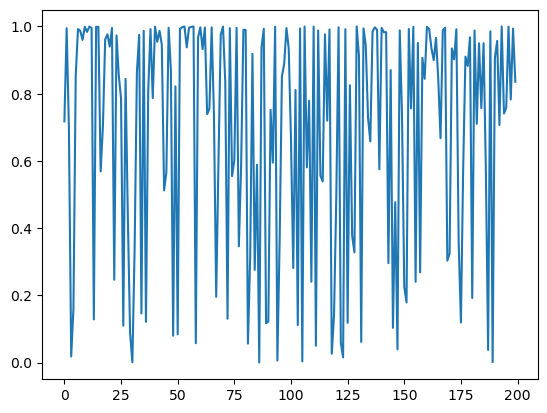

In [91]:
plt.plot(y_test)

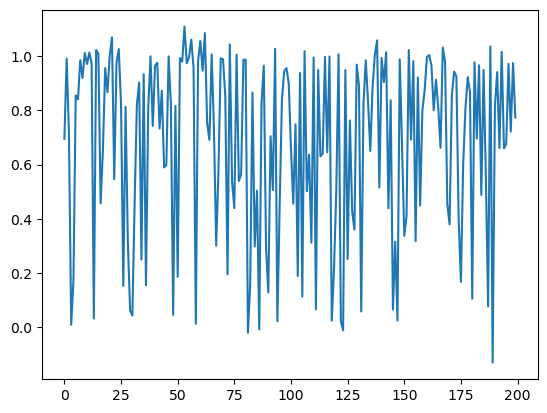

In [92]:
plt.plot(mean)

In [93]:
likelihood.noise

tensor([0.0073], grad_fn=<AddBackward0>)

In [94]:
mean.min()


tensor(-0.1307)

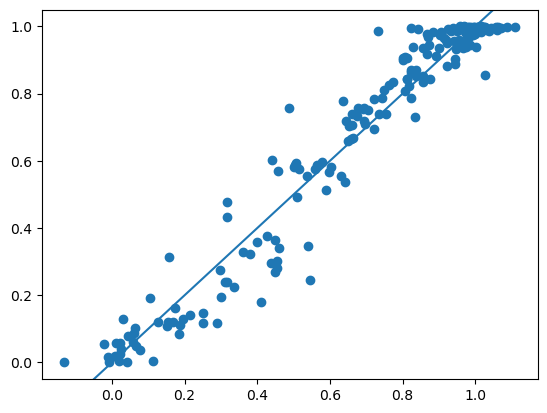

In [95]:
plt.scatter(mean,y_test)
plt.axline((0,0), slope=1)

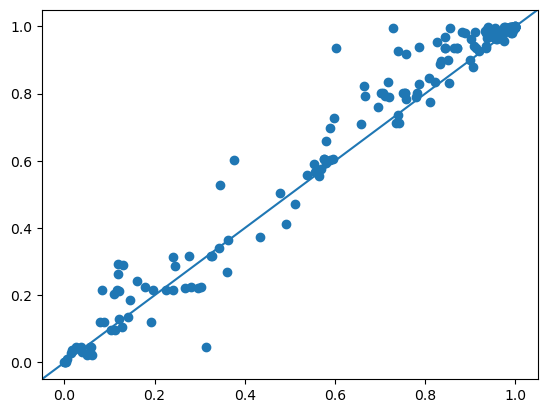

In [96]:
plt.scatter(y_test,torch.tensor(data["p0Mean"].values).float()[indices])
plt.axline((0,0), slope=1)

In [97]:
np.corrcoef(y_test,torch.tensor(data["p0Mean"].values).float()[indices])

array([[1.        , 0.98407053],
       [0.98407053, 1.        ]])

In [98]:
np.corrcoef(mean,y_test)

array([[1.        , 0.97482169],
       [0.97482169, 1.        ]])